
# <center>Regression Algorithms </center>
                                                                           
    

 # <center>By Seema Singh Saharan</center>




# Data Science Project Steps

1. Define the Research problem and questions
2. Analyze data by descriptive statistics and graphical visualization.
3. Prepare data by using relevant preprocessing transformations, data cleaning, 
    data standardization,deaing with null and outlier values. Divide data into test and training set.
4. Fit the train data. Predict the test data.
5. Evaluate the first algorithm and its model performance.
6. Evaluate the current algorithm and variety of algorithms by creating test harness for diverse
    algorithms in conjunction with resampling techniques like cross validation, variable importance.
    bootstrapping.Improve Result by playing with hyperparameters and innovative methods like 
   ensembles.
7. Choose the best model and present the results. 

##  Define the Research problem and questions

Predict the Cholesterol using Age.

## Analyze data by descriptive statistics and graphical visualization.

In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sb
import scipy.stats as stat
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

heartattackData = pd.read_csv('HeartAttack.csv')
import warnings
warnings.filterwarnings('ignore')
print(heartattackData.shape)
print(heartattackData.head())


(270, 14)
   Age  Sex  Chest_Pain_Type   BP  Cholesterol  Fasting_Blood_MoreThan_120  \
0   70    1                4  130          322                           0   
1   67    0                3  115          564                           0   
2   57    1                2  124          261                           0   
3   64    1                4  128          263                           0   
4   74    0                2  120          269                           0   

   Resting_Electrocardiographic_Reading  Maximum_Heart_Rate   \
0                                     2                  109   
1                                     2                  160   
2                                     0                  141   
3                                     0                  105   
4                                     2                  121   

   Exercise_Induced_Angina  Old_Peak  Slope  Number_Blood_Vessels_Calcified  \
0                        0       2.4      2              

## Prepare data by using relevant preprocessing transformations, data cleaning, data standardization,deaing with null and outlier values. Divide data into test and training set.
## Fit the train data. Predict the test data.
## Evaluate the first algorithm and its model performance.

[169.01263669]
[[1.48025105]]


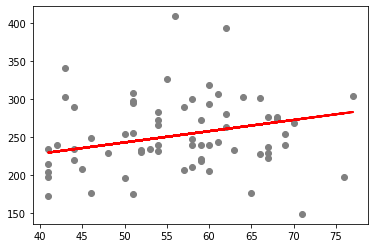

    Actual   Predicted
0      233  262.268453
1      177  237.104185
2      303  263.748704
3      269  272.630210
4      175  244.505440
..     ...         ...
63     235  229.702930
64     197  281.511716
65     218  256.347449
66     277  269.669708
67     254  271.149959

[68 rows x 2 columns]
Mean Squared Error: 2382.4195483481294
Root Mean Squared Error: 48.810035324184405


In [2]:
Age_reshape = heartattackData['Age'].values.reshape(-1,1)

Cholesterol_reshape= heartattackData['Cholesterol'].values.reshape(-1,1)

#Regression
X_train, X_test, y_train, y_test = train_test_split(Age_reshape, Cholesterol_reshape, test_size=0.25, random_state=0)
regressor = LinearRegression()  
#Training the Regression algorithm
regressor.fit(X_train, y_train) 
 # Intercept:
print(regressor.intercept_)
# Slope:
print(regressor.coef_)

y_pred = regressor.predict(X_test)
# Create scatter plot
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
print(df)

# Mean Squared Errror and Root Mean Squared Error
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


## Evaluate the current algorithm and variety of algorithms by creating test harness for diverse algorithms in conjunction with resampling techniques like cross validation, variable importance.bootstrapping.Improve Result by playing with hyperparameters and innovative methods like Logistic Regression,Lasso Regression or Ridge Regression
  

### Predict Risk using all the other variables in the HeartAttack dataset.

## Logistic Regression 

In [3]:
#https://scikitlearn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

# define dataset
heartattackData = pd.read_csv('HeartAttack.csv')
#print(heartattackData)
X = heartattackData[heartattackData.columns[0:12]]
print(X)
y = heartattackData[['Risk']]

# Dividing data into two subsets :train and test set.Training set trains the model
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

# Data normalization  
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# define models and parameters
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# defining grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, np.ravel(y_train))
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

     Age  Sex  Chest_Pain_Type   BP  Cholesterol  Fasting_Blood_MoreThan_120  \
0     70    1                4  130          322                           0   
1     67    0                3  115          564                           0   
2     57    1                2  124          261                           0   
3     64    1                4  128          263                           0   
4     74    0                2  120          269                           0   
..   ...  ...              ...  ...          ...                         ...   
265   52    1                3  172          199                           1   
266   44    1                2  120          263                           0   
267   56    0                2  140          294                           0   
268   57    1                4  140          192                           0   
269   67    1                4  160          286                           0   

     Resting_Electrocardiographic_Readi

## Ridge Regression

In [4]:
# https://scikit-learn.org/stable/modules/linear_model.html#ridge-regression-and-classification

# example of grid searching key hyperparametres for ridge classifier

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import Lasso
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

# define dataset
heartattackData = pd.read_csv('HeartAttack.csv')
#print(heartattackData)
X = heartattackData[heartattackData.columns[0:12]]
print(X)
y = heartattackData[['Risk']]

# Dividing data into two subsets :train and test set.Training set trains the model
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

# Data normalization  
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


# define models and parameters
model = RidgeClassifier()
alpha = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
# define grid search
grid = dict(alpha=alpha)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, np.ravel(y_train))
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))



     Age  Sex  Chest_Pain_Type   BP  Cholesterol  Fasting_Blood_MoreThan_120  \
0     70    1                4  130          322                           0   
1     67    0                3  115          564                           0   
2     57    1                2  124          261                           0   
3     64    1                4  128          263                           0   
4     74    0                2  120          269                           0   
..   ...  ...              ...  ...          ...                         ...   
265   52    1                3  172          199                           1   
266   44    1                2  120          263                           0   
267   56    0                2  140          294                           0   
268   57    1                4  140          192                           0   
269   67    1                4  160          286                           0   

     Resting_Electrocardiographic_Readi